## Fetch Articles (for Testing)

In [1]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from huggingface_hub import InferenceClient
from transformers import BertTokenizer
from utils.preprocessing import *
from utils.accelerators import *
from utils.multithreading import *
from utils.database import *
from utils.model import *
from utils.files import *
from datasets import Dataset
from rouge import Rouge
from tqdm import tqdm
import statistics
import hashlib
import random
import openai
import time
import math
import re

/home/jschelb/.pyenv/versions/3.10.8/envs/mediacloud/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Connect to Database

Credentials are sourced from the `.env` file.

In [11]:
_, db = getConnection(use_dotenv=True)

In [12]:
data = db.articles.sampled.triplets.find({}, {'_id': 0, 'parsing_result.word_count': 1})

In [13]:
# Extract values from the query result
values = [item['parsing_result']['word_count'] for item in data if 'parsing_result' in item and 'word_count' in item['parsing_result']]


In [14]:
print(f"Mean: {statistics.mean(values)}")

Mean: 921.8152036996256


In [15]:
len(values)

227050

In [16]:
values[:10]

[262, 733, 329, 1212, 483, 1432, 1302, 409, 236, 633]

In [43]:
large_values = [value for value in values if value > 10000]
len(large_values)

1791

In [21]:
filtered_values = [value for value in values if value <= 5000]

In [36]:
# Count the values in bins of 1000s
bins = range(0, 5001, 1000)  # Define bins (0-1000, 1001-2000, ..., 4001-5000)
bin_counts = {f"{bin_start}-{bin_start+999}": 0 for bin_start in bins[:-1]}  # Initialize bin counts

for value in filtered_values:
    for bin_start in bins[:-1]:
        if bin_start <= value < bin_start + 1000:
            bin_counts[f"{bin_start}-{bin_start+999}"] += 1
            break

# Print the counts per bin
for bin_range, count in bin_counts.items():
    print(f"Counts for bin {bin_range}: {count}")


Counts for bin 0-999: 183876
Counts for bin 1000-1999: 29610
Counts for bin 2000-2999: 5733
Counts for bin 3000-3999: 2360
Counts for bin 4000-4999: 1245


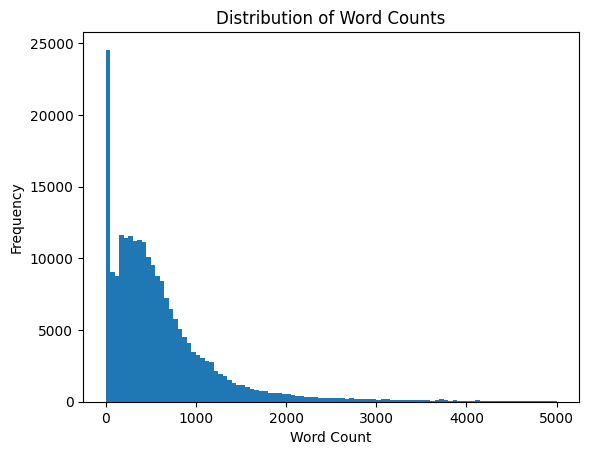

In [22]:
import matplotlib.pyplot as plt

# Plotting the histogram
plt.hist(filtered_values, bins=100)  # You can adjust the number of bins
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
#plt.xlim([0, 5000]) 

plt.show()


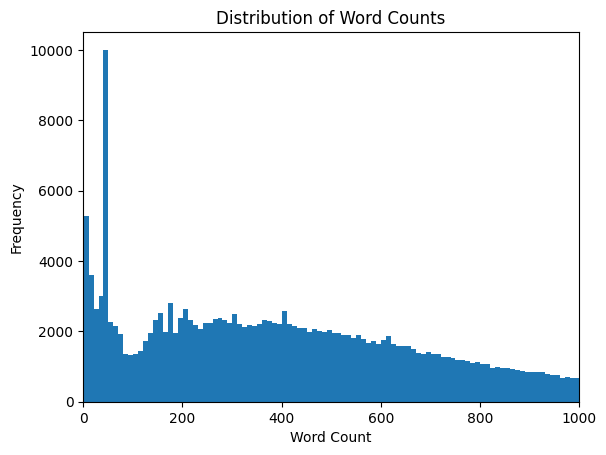

In [33]:
# Plotting the histogram
plt.hist(filtered_values, bins=500)  # You can adjust the number of bins
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.xlim([0, 1000]) 

plt.show()
